In [1]:
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 MB 20.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 14.1 MB/s eta 0:00:00
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0


In [3]:
import torch as t
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import numpy as np

### Machine Learning Overview:
Machine Learning (ML) is a subset of artificial intelligence (AI) that focuses on building algorithms that can learn from and make predictions or decisions based on data.

### Deep Learning:
Deep Learning is a subfield of machine learning that deals with algorithms inspired by the structure and function of the brain called artificial neural networks. These networks have multiple layers (hence 'deep'), allowing them to learn intricate patterns from large amounts of data.

### Key Components of Deep Learning:
- Neural Networks: These are the building blocks of deep learning models. They consist of interconnected layers of nodes (neurons) that process and transform data.
- Activation Functions: These functions introduce non-linearities to the network, enabling it to learn complex mappings between inputs and outputs.
- Loss Functions: These functions quantify the difference between the predicted and actual outputs of the model during training. The goal is to minimize this difference.
- Optimization Algorithms: These algorithms adjust the parameters (weights and biases) of the neural network to minimize the loss function, typically using techniques like gradient descent.






## Neural Networks

Neural networks are a fundamental component of deep learning, inspired by the structure and function of the human brain. They consist of interconnected layers of nodes (neurons) that process and transform data. Each neuron performs a weighted sum of its inputs, applies an activation function to the result, and passes the output to the next layer. Through a process called training, neural networks learn to adjust the weights of connections between neurons to minimize the difference between predicted and actual outputs for a given set of inputs.

### Anatomy of a Neuron

A neuron in a neural network consists of the following components:

- **Inputs (x):** Numerical values representing features or inputs to the neuron.
- **Weights (w):** Parameters that represent the strength of connections between neurons.
- **Bias (b):** An additional parameter added to the weighted sum, allowing the neuron to learn an offset from zero.
- **Activation Function (σ):** A non-linear function applied to the weighted sum to introduce non-linearity and enable the network to learn complex patterns.

The output of a neuron (y) is computed as follows:
$$
 y = \sigma(\sum_{i=1}^{n} w_i x_i + b) 
$$

Where:
- $ y $ is the output of the neuron.
- $ \sigma $ is the activation function.
- $w_i$ are the weights.
- $x_i$ are the inputs.
- $b$ is the bias.
- $n$ is the number of inputs.

### Mathematical Notation

In mathematical notation, a neural network can be represented as a series of operations performed on the inputs, weights, biases, and activation functions.

Let's consider a simple feedforward neural network with one input layer, one hidden layer, and one output layer.

- **Input Layer (Layer 0):** $x = [x_1, x_2, \ldots, x_n]$
- **Hidden Layer (Layer 1):** $h = \sigma(W^{(1)}x + b^{(1)})$
- **Output Layer (Layer 2):** $y = \sigma(W^{(2)}h + b^{(2)})$

Where:
- $W^{(1)}$ and $W^{(2)}$ are weight matrices for the hidden and output layers, respectively.
- $b^{(1)}$ and $b^{(2)}$ are bias vectors for the hidden and output layers, respectively.
- $\sigma$ represents the activation function applied element-wise.

The network parameters (weights and biases) are learned during training via optimization algorithms such as gradient descent to minimize a predefined loss function.

Neural networks can have multiple layers (deep neural networks) and various architectures tailored to specific tasks, enabling them to learn complex relationships in data.


In [4]:
# Sample forward pass
x = t.tensor([[1, 2, 3, 4]], dtype=t.float32)
y = t.tensor([[1.99, 3.96, 5.01, 8.05]], dtype=t.float32)
w = t.tensor([[0.0]], dtype=t.float32, requires_grad=True)

# model output
def forward():
    return t.matmul(w, x)
#
forward()


tensor([[0., 0., 0., 0.]], grad_fn=<MmBackward0>)

## Loss Function in Neural Networks

In neural networks, the loss function measures the difference between the predicted outputs and the actual targets, providing a quantifiable measure of how well the model is performing.

### Importance of Loss Function

The choice of loss function depends on the task being solved, such as classification, regression, or generative modeling. Different loss functions are designed to optimize specific objectives, ensuring that the model learns the desired behavior effectively.

### Common Loss Functions

Some common loss functions used in neural networks include:
- **Mean Squared Error (MSE):** Used in regression tasks to measure the average squared difference between predicted and actual values.
- **Binary Cross-Entropy Loss:** Used in binary classification tasks to measure the difference between predicted probabilities and actual binary labels.

### Mathematical Notation

The loss function is typically denoted as \( J(\theta) \), where \( \theta \) represents the parameters of the model. For example, in regression tasks, the Mean Squared Error (MSE) loss function can be expressed as:

$$
J(\theta) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$

Where:
- $ N $ is the number of samples in the dataset.
- $ y_i $ is the actual target value.
- $ \hat{y}_i $ is the predicted value by the model.

- **Binary Cross-Entropy Loss (BCE Loss):** Used in binary classification tasks to measure the difference between predicted probabilities and actual binary labels.

The Binary Cross-Entropy (BCE) Loss function is defined as:

$$
J(\theta) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

Where:
- $ N $ is the number of samples in the dataset.
- $ y_i $ is the actual binary label (0 or 1) of the \( i \)-th sample.
- $ \hat{y}_i $ is the predicted probability of the positive class for the \( i \)-th sample (i.e., the output of the sigmoid function applied to the model's output).
- $ \log $ denotes the natural logarithm.

The BCE Loss function penalizes the model more heavily for making incorrect predictions, with the penalty increasing logarithmically as the predicted probability diverges from the actual label.




In [5]:
# Sample loss
loss = nn.MSELoss()
print(loss(forward(), y))


tensor(27.3861, grad_fn=<MseLossBackward0>)


## Optimization Step in Neural Networks

The optimization step in neural networks involves updating the weights and biases of the model to minimize the difference between the predicted and actual outputs. This process is typically done using optimization algorithms such as gradient descent.

### Gradient Descent

Gradient descent is a popular optimization algorithm used to minimize the loss function by iteratively adjusting the parameters of the neural network. It works by computing the gradient of the loss function with respect to each parameter and updating the parameters in the opposite direction of the gradient to descend along the steepest slope of the loss surface.

The update rule for gradient descent can be expressed mathematically as follows:

$$
\theta_{t+1} = \theta_t - \alpha \nabla J(\theta_t)
$$

Where:
- $\theta_t$ represents the parameters of the model at iteration $t$.
- $\alpha$ is the learning rate, which controls the size of the step taken during each iteration.
- $\nabla J(\theta_t)$ is the gradient of the loss function $J$ with respect to the parameters $\theta_t$.
- $\theta_{t+1}$ is the updated parameters after one iteration of gradient descent.

By iteratively updating the parameters using gradient descent, the neural network learns to minimize the loss function, leading to better performance on the training data.

### Stochastic Gradient Descent (SGD)

Stochastic Gradient Descent (SGD) is a variant of gradient descent that updates the parameters using mini-batches of training data rather than the entire dataset. This approach reduces the computational cost of computing gradients and allows for faster convergence.

The update rule for SGD can be expressed as:

$$
\theta_{t+1} = \theta_t - \alpha \nabla J(\theta_t; x^{(i)}, y^{(i)})
$$

Where:
- $x^{(i)}$ and $y^{(i)}$ are the input and target output of the $i$-th training example.
- $\nabla J(\theta_t; x^{(i)}, y^{(i)})$ is the gradient of the loss function $J$ with respect to the parameters $\theta_t$ computed using the $i$-th training example.

SGD is widely used in training neural networks due to its efficiency and scalability to large datasets.

## Optimization Algorithms in Neural Networks

There are many optimization algorithms like Gradient Descent and Stochastic Gradient Descent commonly used in training neural networks. For more advanced optimization techniques, one can explore algorithms such as Adam, RMSProp, AdaGrad, AdaDelta, and Momentum, which are well-documented in the PyTorch library.







In [6]:
optimizer = optim.SGD([w], lr=0.01)

for i in range(100):
    optimizer.zero_grad()
    loss_value = loss(forward(), y)
    loss_value.backward()
    optimizer.step()
    if i % 10 == 0:
        print('Iteration: {} Loss: {:.4f} Weight: {:.4f}'.format(i, loss_value.item(), w.item()))


Iteration: 0 Loss: 27.3861 Weight: 0.2857
Iteration: 10 Loss: 1.2325 Weight: 1.5859
Iteration: 20 Loss: 0.2188 Weight: 1.8419
Iteration: 30 Loss: 0.1795 Weight: 1.8923
Iteration: 40 Loss: 0.1780 Weight: 1.9022
Iteration: 50 Loss: 0.1779 Weight: 1.9042
Iteration: 60 Loss: 0.1779 Weight: 1.9046
Iteration: 70 Loss: 0.1779 Weight: 1.9046
Iteration: 80 Loss: 0.1779 Weight: 1.9047
Iteration: 90 Loss: 0.1779 Weight: 1.9047


## DEVELOPING A MODEL IN TORCH

Now that we've grasped the fundamentals of training a neural network on a basic Torch dataset, let's delve deeper into implementing more complex deep neural networks using Torch. We'll explore how to construct deep architectures and effectively train them to tackle both regression and classification problems. By understanding the intricacies of building and training deep neural networks, we can unlock their potential to handle more intricate data structures and patterns, enabling us to solve a broader range of real-world problems with greater accuracy and efficiency. Through this journey, we'll gain invaluable insights into optimizing network architectures, selecting appropriate loss functions, fine-tuning hyperparameters, and leveraging advanced techniques to achieve optimal performance across various tasks. With a solid foundation in deep learning principles and Torch's powerful capabilities, we're poised to tackle the challenges of building robust and versatile neural network models for regression and classification tasks alike.

In this code segment we created a regression model with linear - relu - linear - sigmoid - linear layers and defined a forward pass to the model.

In [7]:
class RegressionModel(t.nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear1 = nn.Linear(1, 100, bias=True)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(100, 1, bias=True)
        self.sigmoid = nn.Sigmoid()
        self.linear3 = nn.Linear(1, 1, bias=True)
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.sigmoid(x)
        x = self.linear3(x)
        return x      

In this code segment we created a classification model with linear - relu - linear - sigmoid - linear layers and defined a forward pass to the model.

In [8]:
class ClassificationModel(t.nn.Module):
    def __init__(self):
        super(ClassificationModel, self).__init__()
        self.linear1 = nn.Linear(2, 10, bias=True)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(10, 10, bias=True)
        self.sigmoid = nn.Sigmoid()
        self.linear3 = nn.Linear(10, 2, bias=True)
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        x = self.sigmoid(x)
        return x

## DATA GENERATION

We created a dataset with this equation and add a noise to it:
$$
y = x^2 + 0.2
$$

In [9]:
# Generating synthetic data for regression
t.manual_seed(1)
x_reg = t.unsqueeze(t.linspace(-1, 1, 100), dim=1)
y_reg = x_reg.pow(2) + 0.2 * t.rand(x_reg.size())
# The equation of the data is y = x^2 + 0.2 * random noise 
x_reg.shape, y_reg.shape



(torch.Size([100, 1]), torch.Size([100, 1]))

In [10]:
from sklearn.datasets import make_classification
# Generating a synthetic dataset with 2 features for Logistic Regression
x_cl, y_cl = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
x_cl = t.tensor(x_cl, dtype=t.float32)
y_cl = t.tensor(y_cl, dtype=t.float32)
x_cl.shape, y_cl.shape

(torch.Size([100, 2]), torch.Size([100]))

## REGRESSION MODEL
In this section we created a model and train the network in 1000 epochs. Our optimizer is Gradient Descent and loss function is Mean-Squared Loss.

In [11]:
# Training the model and keep the weights and biases of the model in each 100 epochs and keep the loss
class Regression():
    def __init__(self, x, y):
        # model: the model to be trained
        self.model = RegressionModel()
        # criterion: the loss function
        self.criterion = nn.MSELoss()
        # optimizer: the optimizer
        self.optimizer = optim.SGD(self.model.parameters(), lr=0.1)
        # losses: the loss of the model in each 100 iterations
        self.losses = []
        # epochs: the number of epochs
        self.epochs = 1000
        # x: the input data
        self.x = x
        # y: the output data
        self.y = y
        # weights: the weights of the model in each 100 epochs
        self.weights = []
        # biases: the biases of the model in each 100 epochs
        self.biases = []

        

    def train(self):
        # Training the model
        for epoch in range(self.epochs):
            
            # Set the gradients to zero because the backward() function accumulates the gradients
            self.optimizer.zero_grad()
            # Forward pass
            outputs = self.model(self.x)
            # Calculate the loss
            loss = self.criterion(outputs, self.y)
            # Backward pass
            loss.backward()
            # Update the weights and biases
            self.optimizer.step()
            if (epoch+1) % 100 == 0:
                print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, self.epochs, loss.item()))
            #Keep the loss
            self.losses.append(loss.item())
            # Keep the weights and biases
            self.weights.append(self.model.linear1.weight.data.sum().item())
            self.biases.append(self.model.linear1.bias.data.sum().item())
    def plot(self):
        # Plot the weights and biases
        plt.plot(range(self.epochs), self.weights, label='Weight')
        plt.plot(range(self.epochs), self.biases, label='Bias')
        plt.xlabel('Epochs')
        plt.ylabel('Value')
        plt.legend()
        plt.show()


        
                
    




    

In [12]:
rgmodel = Regression(x_reg, y_reg)
rgmodel.train()


Epoch [100/1000], Loss: 0.0648
Epoch [200/1000], Loss: 0.0304
Epoch [300/1000], Loss: 0.0094
Epoch [400/1000], Loss: 0.0046
Epoch [500/1000], Loss: 0.0037
Epoch [600/1000], Loss: 0.0034
Epoch [700/1000], Loss: 0.0032
Epoch [800/1000], Loss: 0.0031
Epoch [900/1000], Loss: 0.0031
Epoch [1000/1000], Loss: 0.0030


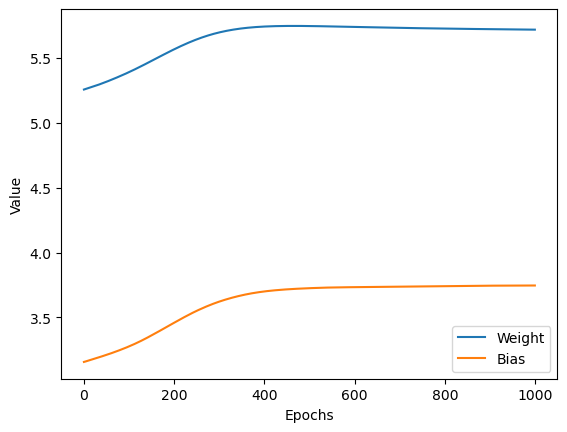

In [13]:
# Plot the weights, biases and loss
rgmodel.plot()

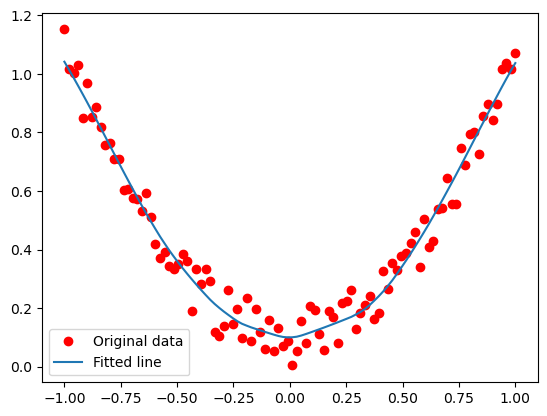

In [14]:
# Evaluating the model
rgmodel.model.eval()
with t.no_grad():
    predicted = rgmodel.model(x_reg)
    plt.plot(x_reg, y_reg, 'ro', label='Original data')
    plt.plot(x_reg, predicted, label='Fitted line')
    plt.legend()
    plt.show()



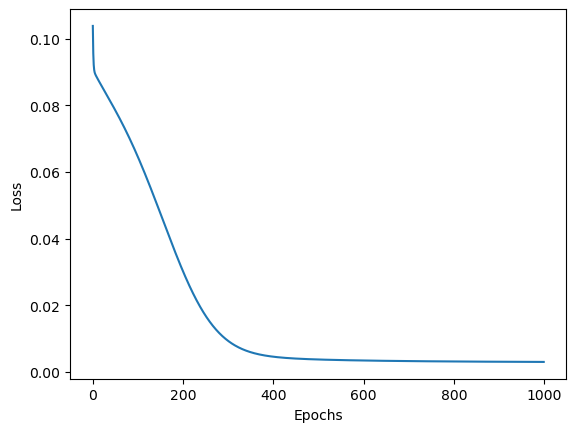

In [15]:
# Plotting the loss
plt.plot(rgmodel.losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


## CLASSIFICATION MODEL
In the following code segment, we define a classification model using PyTorch and train the network using gradient descent with cross-entropy loss.

In [16]:
class Classification():
    def __init__(self):
        # model: the model to be trained
        self.model = ClassificationModel()
        # criterion: the loss function
        self.criterion = nn.CrossEntropyLoss()
        # optimizer: the optimizer
        self.optimizer = optim.SGD(self.model.parameters(), lr=0.1)
        # losses: the loss of the model in each 100 iterations
        self.losses = []
        # epochs: the number of epochs
        self.epochs = 1000
        # x: the input data
        self.x = x_cl
        # y: the output data
        self.y = y_cl
        # weights: the weights of the model in each 100 epochs
        self.weights = []
        # biases: the biases of the model in each 100 epochs
        self.biases = []
    def train(self):
        # Training the model
        for i in range(self.epochs):
            # Set the gradients to zero because the backward() function accumulates the gradients
            self.optimizer.zero_grad()
            # Forward pass 
            outputs = self.model(self.x)
            # Calculate the loss
            loss = self.criterion(outputs.squeeze(), self.y.long())
            # Backward pass
            loss.backward()
            # Update the weights and biases
            self.optimizer.step()
            self.losses.append(loss.item())
            if (i+1) % 100 == 0:
                print('Epoch [{}/{}], Loss: {:.4f}'.format(i+1, self.epochs, loss.item()))
            #Keep the weights and biases
            self.weights.append(self.model.linear1.weight.data.sum().item())
            self.biases.append(self.model.linear1.bias.data.sum().item())
            
    def predict(self, x):
        predicted = self.model(x).detach().numpy()
        return np.argmax(predicted, axis=1),
    def plot(self):
        # Plot the weights and biases
        plt.plot(range(self.epochs), self.weights, label='Weight')
        plt.plot(range(self.epochs), self.biases, label='Bias')
        plt.xlabel('Epochs')
        plt.ylabel('Value')
        plt.legend()
        plt.show()
        
        

In [17]:
# Training the model 
clmodel = Classification()
clmodel.train()



Epoch [100/1000], Loss: 0.5847
Epoch [200/1000], Loss: 0.3653
Epoch [300/1000], Loss: 0.3288
Epoch [400/1000], Loss: 0.3210
Epoch [500/1000], Loss: 0.3180
Epoch [600/1000], Loss: 0.3166
Epoch [700/1000], Loss: 0.3158
Epoch [800/1000], Loss: 0.3152
Epoch [900/1000], Loss: 0.3149
Epoch [1000/1000], Loss: 0.3146


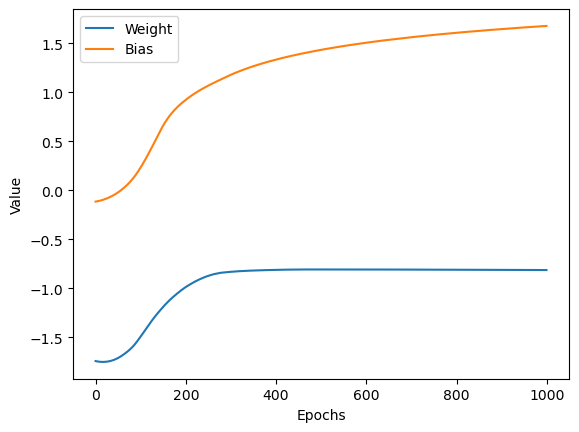

In [18]:
clmodel.plot()

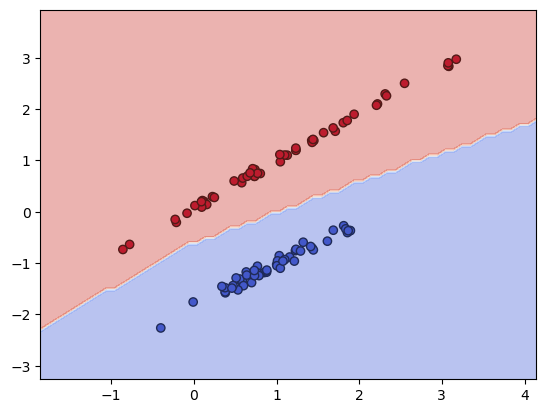

In [19]:
# Plot the classes and the decision boundary
clmodel.model.eval()
with t.no_grad():
    predicted = clmodel.model(x_cl)
    # Colors of the classes are yellow and blue
    plt.scatter(x_cl[:,0], x_cl[:,1], c=clmodel.predict(x_cl), cmap='coolwarm', edgecolor='k')
    # plot the decision boundary
    x_min, x_max = x_cl[:, 0].min() - 1, x_cl[:, 0].max() + 1
    y_min, y_max = x_cl[:, 1].min() - 1, x_cl[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = clmodel.predict(t.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=t.float32))
    Z = np.array(Z).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)


    plt.show()

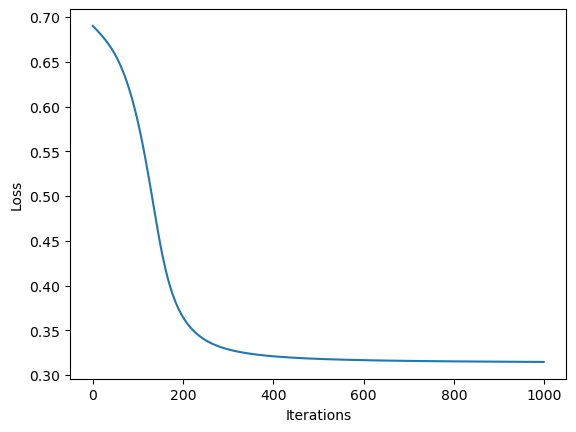

In [20]:
# Plotting the loss
plt.plot(clmodel.losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()